In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas import DataFrame
df = pd.read_csv("data/movie_review/train.tsv",sep='\t')

In [3]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
df.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [10]:
df_train = pd.read_csv("data/movie_review/train.tsv",sep='\t')
df_test = pd.read_csv("data/movie_review/test.tsv",sep='\t')

## Feature

In [13]:
import string
import re

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
df_train['Phrase1'] = df_train['Phrase'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)).lower())
df_test['Phrase1'] = df_test['Phrase'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)).lower())

In [18]:
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase1
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [19]:
# KDE

In [20]:
temp = df_train['SentenceId'].value_counts()
display(temp.describe())

count    8529.000000
mean       18.297573
std         9.950209
min         1.000000
25%        11.000000
50%        17.000000
75%        25.000000
max        63.000000
Name: SentenceId, dtype: float64

In [21]:
temp

1       63
5555    63
509     59
625     58
403     57
        ..
8451     1
5718     1
3560     1
1666     1
1178     1
Name: SentenceId, Length: 8529, dtype: int64

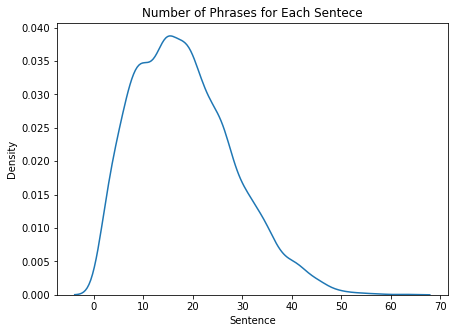

In [22]:
plt.figure(figsize=(7,5))
sns.kdeplot(temp,label='Number of Phrases')
plt.title('Number of Phrases for Each Sentece')
plt.xlabel('Sentence')
plt.show()

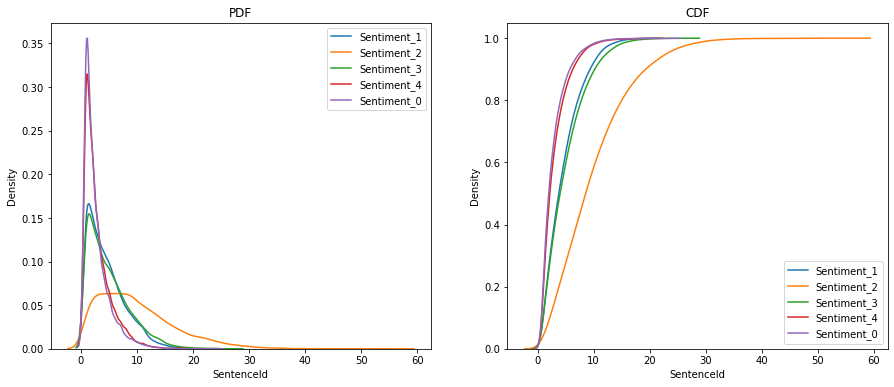

In [32]:
fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
for i in df_train['Sentiment'].unique():
    a = df_train.loc[df_train['Sentiment']==i]['SentenceId'].value_counts()
    sns.kdeplot(a,label="Sentiment_"+str(i),ax=ax1)
    sns.kdeplot(a,label="Sentiment_"+str(i),ax=ax2,cumulative=True)

ax1.set_title('PDF')
ax2.set_title('CDF')
ax1.legend()
ax2.legend()
plt.show()

In [28]:
for i in df_train['Sentiment'].unique():
    a = df_train.loc[df_train['Sentiment']==i]['SentenceId'].value_counts()
    print("Sentiment_"+str(i))
    print(a)
    

Sentiment_1
502     20
4285    20
5864    19
6426    19
7639    18
        ..
7870     1
1725     1
5209     1
393      1
621      1
Name: SentenceId, Length: 6001, dtype: int64
Sentiment_2
1       56
22      51
7705    47
82      45
240     44
        ..
5871     1
7580     1
3504     1
6976     1
8493     1
Name: SentenceId, Length: 8115, dtype: int64
Sentiment_3
595     27
3429    24
2390    23
1927    23
7529    22
        ..
7431     1
1316     1
4571     1
1384     1
1038     1
Name: SentenceId, Length: 6699, dtype: int64
Sentiment_4
4563    21
6869    18
1772    18
5530    18
1778    17
        ..
4632     1
6646     1
6689     1
2548     1
2047     1
Name: SentenceId, Length: 3123, dtype: int64
Sentiment_0
3189    24
5813    18
4099    16
4786    15
3678    14
        ..
3236     1
1189     1
5287     1
1205     1
2692     1
Name: SentenceId, Length: 2609, dtype: int64


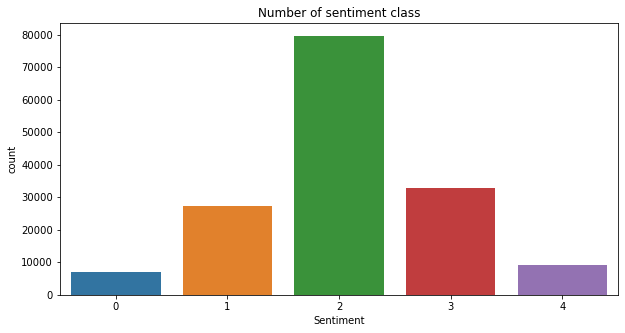

In [33]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(x=df_train['Sentiment'],data=df_train)
plt.show()

# Feature Engineering unpreprocessed data

In [34]:
def Preprocessing(phrase):
    corpus=[]
    for text in phrase:
        text = text.lower()
        text = text.strip()
#         text = re.sub(r"n't"," not",text)
#         text = re.sub(r"n't"," not",text)
        text = " ".join([stem.stem(i) for i in text.split()])
        corpus.append(text)
    return corpus

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [36]:
X = df_train.drop(columns='Sentiment')
y = df_train['Sentiment']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(117045, 4) (117045,)
(39015, 4) (39015,)


In [51]:
from nltk.stem import PorterStemmer
stem=PorterStemmer()

In [52]:
train_text = Preprocessing(x_train['Phrase'])
test_text = Preprocessing(x_test['Phrase'])

In [46]:
vc = TfidfVectorizer(stop_words=None, ngram_range=(1,3), max_features=500)

In [56]:
train_feat = vc.transform(train_text)
test_feat = vc.transform(test_text)

In [53]:
# y_pred = vc.fit_transform(test_text)

In [59]:
train_feat.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
# stem=PorterStemmer()
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import warnings
warnings.filterwarnings("ignore")

In [70]:
def Feature_engineering_1(text_data):
    f1=[len(text) for text in text_data]
    f2=[len(text.split()) for text in text_data]
    f3=[]
    for text in text_data:
        words=[word in stop_words for word in text.split()]
        f3.append(sum(words))
    f4=[]    
    for text in text_data:
        words=[word in string.punctuation for word in word_tokenize(text)]
        f4.append(sum(words))
    return f1,f2,f3,f4

def Feature_engineering_2(text_data):
    f1=[len(text) for text in text_data]
    f2=[len(text.split()) for text in text_data]
    
    return f1,f2

In [72]:
f1,f2=Feature_engineering_2(train_text)
f11,f22=Feature_engineering_2(test_text)
x_train["f1"]=f1
x_train["f2"]=f2
x_test['f1']=f11
x_test['f2']=f22

In [73]:
from scipy.sparse import hstack
train_text = hstack([train_feat,x_train.iloc[:,[-6,-5,-2,-1]].values])
# test_feat = hstack([test_feat,x_test.iloc[:,[-6,-5,-2,-1]].values])

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [78]:
model_nb=MultinomialNB()
model_nb.fit(train_feat,y_train)
y_val_pre=model_nb.predict(test_feat)
y_train_pre=model_nb.predict(train_feat)

print("The accuracy of Training Data :",accuracy_score(y_train,y_train_pre))
print("The accuracy of Testing Data :",accuracy_score(y_test,y_val_pre))

The accuracy of Training Data : 0.5376735443632791
The accuracy of Testing Data : 0.5363321799307958
